In [2]:
import numpy as np
from collections import Counter
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.sparse as sp
import scipy.io as sio
import anndata
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "/storage10/shuchen/JerberData/"
FP_DAY11 = os.path.join(DATA_PATH, "day11.h5")
FP_DAY30 = os.path.join(DATA_PATH, "day30.h5")
FP_DAY52 = os.path.join(DATA_PATH, "day52.h5")
FP_ALLTIME_SUB = os.path.join(DATA_PATH, "all_timepoints_subsampled.h5")
FP_FIAJ = os.path.join(DATA_PATH, "alltime_fiaj_12100_5000.h5")

In [3]:
adata = anndata.read_h5ad(FP_ALLTIME_SUB)

In [33]:
type(adata.obs.celltype=="DA")

pandas.core.series.Series

In [36]:
adata.obs.time_point=="D52"

index
TTCCCAGGTTCCATGA-1-0      False
AACCGCGAGGTCATCT-1-0      False
TCACAAGTCTTATCTG-1-0      False
TACCTTACACGGTTTA-1-0      False
CCTAGCTAGCGCCTTG-1-0      False
                          ...  
GGGCATCTCAACGCTA-1-150     True
GGCCGATGTGTCCTCT-1-150     True
GCGCAGTTCACGAAGG-1-150     True
GCGCAGTAGGAATGGA-1-150     True
GTCCTCATCTAACTTC-1-150     True
Name: time_point, Length: 205416, dtype: bool

In [39]:
np.sum((adata.obs.treatment=="ROT").astype(bool) & (adata.obs.celltype=="DA").astype(bool))

5055

In [4]:
adata

AnnData object with n_obs × n_vars = 205416 × 32738
    obs: 'sample_index', 'sample_id', 'donor_id', 'cluster_id', 'celltype', 'time_point', 'pool_id', 'treatment'
    obsm: 'X_umap'

In [47]:
(np.unique(adata.obs.donor_id))

array(['HPSI0114i-bezi_3', 'HPSI0114i-eipl_1', 'HPSI0114i-fikt_3',
       'HPSI0114i-kolf_2', 'HPSI0114i-lexy_2', 'HPSI0114i-posc_1',
       'HPSI0114i-rozh_4', 'HPSI0114i-vass_1', 'HPSI0114i-wegi_1',
       'HPSI0114i-zapk_2', 'HPSI0115i-aion_2', 'HPSI0115i-aoxv_1',
       'HPSI0115i-bimq_4', 'HPSI0115i-boqx_2', 'HPSI0115i-gifk_1',
       'HPSI0115i-gost_2', 'HPSI0115i-hecn_6', 'HPSI0115i-iiyk_2',
       'HPSI0115i-iuad_2', 'HPSI0115i-jakt_1', 'HPSI0115i-jotn_2',
       'HPSI0115i-kozf_1', 'HPSI0115i-melw_1', 'HPSI0115i-paim_1',
       'HPSI0115i-pitg_2', 'HPSI0115i-qecv_2', 'HPSI0115i-quze_6',
       'HPSI0115i-sehp_2', 'HPSI0115i-tiku_3', 'HPSI0115i-timk_4',
       'HPSI0115i-uupc_2', 'HPSI0115i-zihe_1', 'HPSI0213i-nawk_55',
       'HPSI0214i-datg_2', 'HPSI0214i-eiwy_1', 'HPSI0214i-feec_2',
       'HPSI0214i-giju_3', 'HPSI0214i-heth_1', 'HPSI0214i-kucg_2',
       'HPSI0214i-pelm_3', 'HPSI0214i-poih_2', 'HPSI0214i-rayr_1',
       'HPSI0215i-deyz_2', 'HPSI0215i-fawm_2', 'HPSI0215i-hip

In [21]:
(np.unique(adata.obs.celltype))

array(['Astro', 'DA', 'Epen1', 'Epen2', 'FPP', 'NB', 'P_FPP', 'P_Sert',
       'Sert', 'U_Neur1', 'U_Neur2', 'U_Neur3'], dtype=object)

In [15]:
bdata = adata[adata.obs.donor_id == "HPSI0514i-fiaj_1"]

In [44]:
np.max(bdata.X)

5174.4976

In [17]:
sc.pp.filter_genes(bdata, min_cells=0.02*bdata.n_obs)

/u/s/y/syan58/miniconda3/envs/network/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:278: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [16]:
bdata

View of AnnData object with n_obs × n_vars = 12100 × 32738
    obs: 'sample_index', 'sample_id', 'donor_id', 'cluster_id', 'celltype', 'time_point', 'pool_id', 'treatment'
    obsm: 'X_umap'

In [18]:
bdata

AnnData object with n_obs × n_vars = 12100 × 12721
    obs: 'sample_index', 'sample_id', 'donor_id', 'cluster_id', 'celltype', 'time_point', 'pool_id', 'treatment'
    var: 'n_cells'
    obsm: 'X_umap'

In [53]:
sc.pp.log1p(bdata)

In [54]:
sc.pp.highly_variable_genes(bdata, n_top_genes=5000, inplace=True)

In [58]:
bdata = bdata[:,bdata.var['highly_variable']]

In [55]:
np.sum(bdata.var['highly_variable'])

5000

In [1]:
bdata

NameError: name 'bdata' is not defined

In [76]:
bdata.write_h5ad(os.path.join(DATA_PATH, "alltime_fiaj_12100_5000.h5"))

In [60]:
sio.mmwrite(os.path.join(DATA_PATH, "alltime_fiaj_12100_5000.mtx"), bdata.X)

In [43]:
bdata

AnnData object with n_obs × n_vars = 12100 × 12721
    obs: 'sample_index', 'sample_id', 'donor_id', 'cluster_id', 'celltype', 'time_point', 'pool_id', 'treatment'
    var: 'n_cells'
    obsm: 'X_umap'

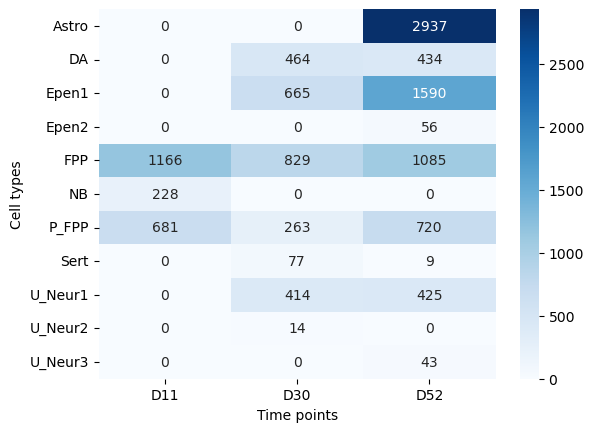

In [50]:
df = pd.crosstab(bdata.obs.celltype, bdata.obs.time_point)
# df.loc['Total'] = df.sum()

# Create a heatmap
sns.heatmap(df, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Time points')
plt.ylabel('Cell types')

# Display the plot
plt.show()